In [130]:
import pandas as pd
import os
import matplotlib.pyplot as ml
import numpy as np
from scipy import stats as st
import seaborn as sb

In [36]:
pizza={"Electronic_City":[29,27,30,27,28],
       "MG_Road":[32,33,31,34,30],
      "Whitefield":[25,24,24,25,26]
      }
pizza


{'Electronic_City': [29, 27, 30, 27, 28],
 'MG_Road': [32, 33, 31, 34, 30],
 'Whitefield': [25, 24, 24, 25, 26]}

In [30]:
data.describe()

,Electronic City,MG Road,Whitefield
count,5.00000,5.000000,5.00000
mean,28.20000,32.000000,24.80000
std,1.30384,1.581139,0.83666
min,27.00000,30.000000,24.00000
25%,27.00000,31.000000,24.00000
50%,28.00000,32.000000,25.00000
75%,29.00000,33.000000,25.00000
max,30.00000,34.000000,26.00000


In [41]:
data=pd.DataFrame(pizza)
data

,Electronic_City,MG_Road,Whitefield
0,29,32,25
1,27,33,24
2,30,31,24
3,27,34,25
4,28,30,26


# Mean

In [34]:
np.mean(data)

Electronic City    28.2
MG Road            32.0
Whitefield         24.8
dtype: float64

# Median

In [24]:
np.median(data)

28.0

# Mode

In [27]:
st.mode(data)

ModeResult(mode=array([[27, 30, 24]], dtype=int64), count=array([[2, 1, 2]]))

# Max Value

In [16]:
maxdata=np.max(data)
maxdata

Electronic City    30
MG Road            34
Whitefield         26
dtype: int64

# Min Value

In [19]:
mindata=np.min(data)

Electronic City    27
MG Road            30
Whitefield         24
dtype: int64

# Range

In [21]:
maxdata-mindata

Electronic City    3
MG Road            4
Whitefield         2
dtype: int64

# Inter quartile Range

In [28]:
st.iqr(data)

5.0

# Compare

In [39]:
data.describe()

,Electronic_City,MG_Road,Whitefield
count,5.00000,5.000000,5.00000
mean,28.20000,32.000000,24.80000
std,1.30384,1.581139,0.83666
min,27.00000,30.000000,24.00000
25%,27.00000,31.000000,24.00000
50%,28.00000,32.000000,25.00000
75%,29.00000,33.000000,25.00000
max,30.00000,34.000000,26.00000


In [54]:
# conclude
## from above data 
## in mean of all, Whitefield is lowest than other two of average time taken for delivery
## in std the data not much spread in whitefield it means the data range not big rather then other 
## same as we seen quartile the maximum of whitefield is less than minimum time taken of other restaurant

In [58]:
# Hypothesis
#null:- time taken by all outlets are eual 
#alt:- time taken by all outlets are not equal
# significant level :- 0.01
# we are using ANOVA Testing 

In [43]:
Whitefield=data["Whitefield"]
Whitefield

0    25
1    24
2    24
3    25
4    26
Name: Whitefield, dtype: int64

In [45]:
MG_Road=data['MG_Road']

In [46]:
Electronic_City=data['Electronic_City']

In [50]:
st.ttest_1samp(Whitefield,25)

Ttest_1sampResult(statistic=-0.5345224838248468, pvalue=0.6213082950374983)

In [51]:
st.ttest_1samp(MG_Road,25)

Ttest_1sampResult(statistic=9.899494936611665, pvalue=0.0005844106153028071)

In [53]:
st.ttest_1samp(Electronic_City,25)
print("The P value",)

The P value Ttest_1sampResult(statistic=5.487954724560281, pvalue=0.005370441980612577)


In [59]:
st.f_oneway(Electronic_City,MG_Road,Whitefield)

F_onewayResult(statistic=39.714285714285666, pvalue=5.112059175968204e-06)

In [61]:
#the value of p is very small than significant value
#time taken by all outlets are not equal
#it conclude that they never be same to deliver the pizza in same time.

In [66]:
os.chdir('D:\Data_Analysis\Data Sets')
hr=pd.read_excel('assignment.xlsx')

In [67]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [88]:
position=hr.groupby("Position")[["Salary"]].sum().sort_values(by='Salary').reset_index()
position

,Position,Salary
0,Software Engineering Manager,77692
1,Data Analyst,88527
2,Shared Services Manager,93046
3,Enterprise Architect,103613
4,BI Director,110929
5,Principal Data Architect,120000
6,IT Manager - Support,138888
7,Data Architect,150290
8,Administrative Assistant,156840
9,IT Manager - Infra,157000


In [98]:
least10=position.nsmallest(10, columns=['Salary'],keep='first')
least10

,Position,Salary
0,Software Engineering Manager,77692
1,Data Analyst,88527
2,Shared Services Manager,93046
3,Enterprise Architect,103613
4,BI Director,110929
5,Principal Data Architect,120000
6,IT Manager - Support,138888
7,Data Architect,150290
8,Administrative Assistant,156840
9,IT Manager - Infra,157000


<BarContainer object of 10 artists>

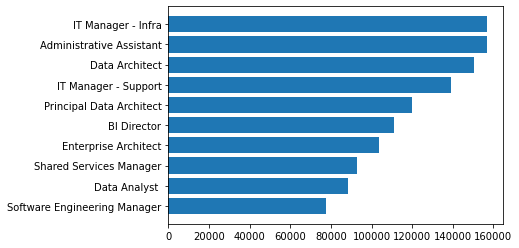

In [96]:
ml.barh(least10.Position,least10.Salary)

In [100]:
hr.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,Age
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,38
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,46
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,33
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,16.0,Indeed,Fully Meets,4.84,5,0,2019-03-01 00:00:00,0,15,33
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,39.0,Google Search,Fully Meets,5.00,4,0,2016-01-02 00:00:00,0,2,32


In [124]:
satisf=hr.groupby("Department")[['EmpSatisfaction']].mean()
satisf

,EmpSatisfaction
Department,
Admin Offices,3.555556
Executive Office,3.000000
IT/IS,3.960000
Production,3.861244
Sales,4.032258
Software Engineering,4.090909


# Maximum Satisfied Department

In [109]:
satisfmost=satisf.nlargest(1,columns=['EmpSatisfaction'])
satisfmost

,EmpSatisfaction
Department,
Software Engineering,4.090909


# Least Satisfied Department

In [126]:
satisleast=satisf.nsmallest(1,columns=['EmpSatisfaction'])
satisleast

,EmpSatisfaction,Var
Department,,
Executive Office,3.0,0.170534


# Variance

In [127]:
satisf['Var']=satisf['EmpSatisfaction'].var()
satisf.sort_values(by="EmpSatisfaction")

,EmpSatisfaction,Var
Department,,
Executive Office,3.000000,0.170534
Admin Offices,3.555556,0.170534
Production,3.861244,0.170534
IT/IS,3.960000,0.170534
Sales,4.032258,0.170534
Software Engineering,4.090909,0.170534


# Find The Impact of Salary on EmpSatisfaction & Engagement Survey

In [144]:
impact=hr[['Salary','EngagementSurvey','EmpSatisfaction']]
impact.sort_values('Salary')

,Salary,EngagementSurvey,EmpSatisfaction
310,45046,4.50,5
140,45069,4.30,5
231,45115,5.00,4
176,45395,4.60,4
152,45433,3.49,4
...,...,...,...
55,170500,3.70,5
96,178000,5.00,5
131,180000,4.50,4
308,220450,4.60,5


<BarContainer object of 311 artists>

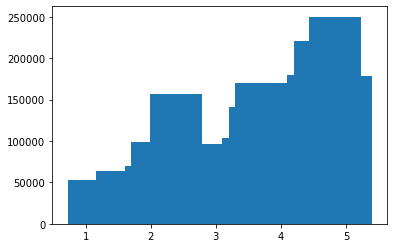

In [147]:
ml.bar(impact.EngagementSurvey,impact.Salary)

<BarContainer object of 311 artists>

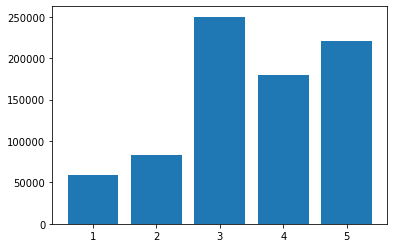

In [148]:
ml.bar(impact.EmpSatisfaction,impact.Salary)


# From the above two graph we can say that Salary play an important role in enployess 